In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import silhouette_score #轮廓系数
from sklearn.metrics import adjusted_rand_score #调整的兰德系数

In [3]:
datas=pd.read_csv('./datas/AsiaFootball.txt')
datas

,国家,2006年世界杯,2010年世界杯,2007亚洲杯
0,中国,50,50,9
1,日本,28,9,4
2,韩国,17,15,3
3,伊朗,25,40,5
4,沙特,28,40,2
5,伊拉克,50,50,1
6,卡塔尔,50,40,9
7,阿联酋,50,40,9
8,乌兹别克斯坦,40,40,5
9,泰国,50,50,9


In [4]:
# 非结构簇集合
k=KMeans(n_clusters=3)
k.fit(datas.iloc[:,1:])
y_=k.predict(datas.iloc[:,1:])
c=datas['国家'].values
for i in range(3):
    cond=y_==i
    print(c[cond])

['中国' '伊拉克' '卡塔尔' '阿联酋' '泰国' '越南' '阿曼' '印尼']
['日本' '韩国']
['伊朗' '沙特' '乌兹别克斯坦' '巴林' '朝鲜']


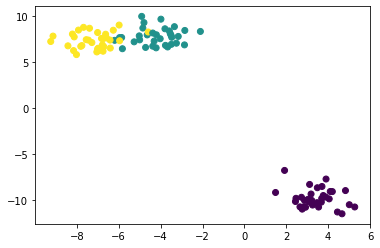

In [5]:
# k值得选取
X,y=datasets.make_blobs(centers=3)
plt.scatter(X[:,0],X[:,1],c=y)

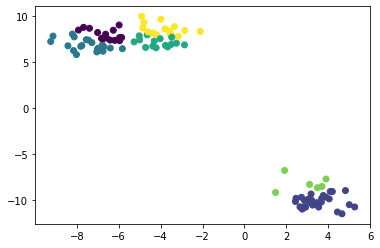

In [6]:
k=KMeans(n_clusters=6)
k.fit(X)
y_=k.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_)

In [7]:
display(y_)
k.labels_

array([3, 5, 1, 5, 2, 1, 2, 0, 3, 1, 2, 2, 1, 5, 3, 0, 5, 4, 4, 3, 2, 2,
       1, 0, 1, 0, 0, 3, 3, 2, 5, 2, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2,
       4, 3, 2, 1, 1, 5, 0, 3, 2, 3, 1, 1, 2, 2, 2, 3, 4, 1, 5, 2, 0, 3,
       0, 3, 5, 1, 5, 2, 3, 1, 1, 5, 5, 0, 3, 1, 1, 5, 4, 2, 0, 1, 0, 5,
       1, 1, 0, 1, 3, 1, 1, 5, 1, 5, 4, 0])

array([3, 5, 1, 5, 2, 1, 2, 0, 3, 1, 2, 2, 1, 5, 3, 0, 5, 4, 4, 3, 2, 2,
       1, 0, 1, 0, 0, 3, 3, 2, 5, 2, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2,
       4, 3, 2, 1, 1, 5, 0, 3, 2, 3, 1, 1, 2, 2, 2, 3, 4, 1, 5, 2, 0, 3,
       0, 3, 5, 1, 5, 2, 3, 1, 1, 5, 5, 0, 3, 1, 1, 5, 4, 2, 0, 1, 0, 5,
       1, 1, 0, 1, 3, 1, 1, 5, 1, 5, 4, 0])

![](./imgs/簇.png)

In [8]:
# 轮廓系数 评价指标
silhouette_score(X,y_)

0.3504910821707133

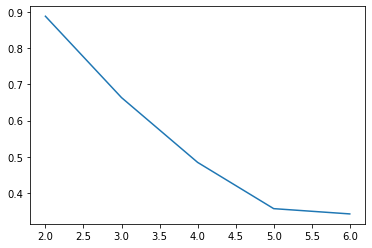

In [9]:
score=[]
for i in range(2,7):
    k=KMeans(n_clusters=i).fit(X)
    score.append(silhouette_score(X,k.labels_))
plt.plot(range(2,7),score)

In [10]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

Text(0, 0.5, '兰德系数')

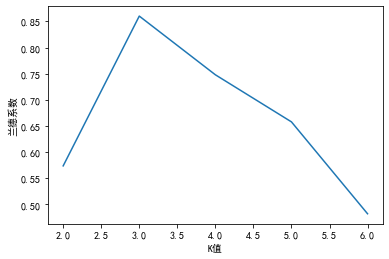

In [11]:
# 调整的兰德系数
score=[]
for i in range(2,7):
    k=KMeans(n_clusters=i).fit(X)
    score.append(adjusted_rand_score(y,k.labels_))
plt.plot(range(2,7),score)
plt.xlabel('K值')
plt.ylabel('兰德系数')

In [12]:
y

array([1, 1, 0, 1, 2, 0, 2, 1, 1, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 2, 2,
       0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2,
       0, 1, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 2, 1,
       2, 1, 1, 0, 1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 2, 1,
       0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 2])